In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,BatchNormalization
from keras.utils import to_categorical
from keras.datasets import cifar100

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

169009152/169001437 [==============================] - 13s 0us/step


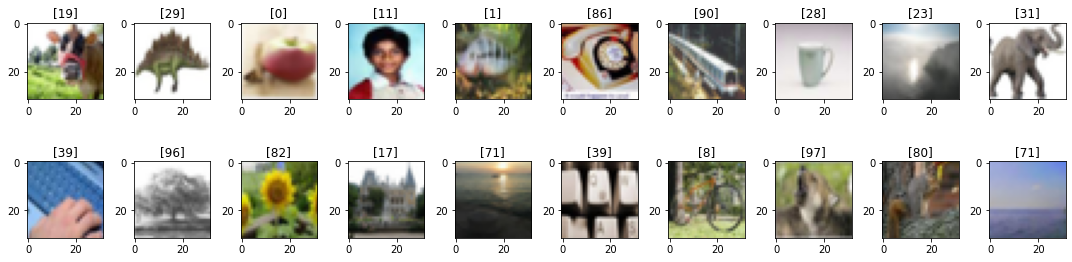

In [3]:
plt.figure(figsize=(15,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(X_train[i])
  plt.title('{}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [0]:
X_train=X_train/255
X_test=X_test/255

In [5]:
y_trainc=to_categorical(y_train)
y_testc=to_categorical(y_test)
girdi=X_train.shape
girdi

(50000, 32, 32, 3)

In [6]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=3,activation='relu',strides=(2,2),input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 8)         224       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               180100    
Total params: 180,324
Trainable params: 180,324
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_trainc,epochs=10,validation_split=0.2,batch_size=16,verbose=0)

In [8]:
train_accuracy=model.evaluate(X_train,y_trainc)[1]
test_accuracy=model.evaluate(X_test,y_testc)[1]
print('Accuracy score of Train Data:',train_accuracy)
print('Accuracy score of Test Data:',test_accuracy)

10000/10000 [==============================] - 1s 62us/step
Accuracy score of Train Data: 0.9923612475395203
Accuracy score of Test Data: 0.9898678660392761


Let's try to improve the model regardless of its high accuracy

In [9]:
model2=Sequential()
model2.add(Conv2D(filters=8,kernel_size=5,activation='relu',strides=(2,2),input_shape=(32,32,3)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(100,activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 8)         608       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               156900    
Total params: 157,508
Trainable params: 157,508
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_trainc,epochs=10,validation_split=0.2,batch_size=16,verbose=0)

In [11]:
train_accuracy=model2.evaluate(X_train,y_trainc)[1]
test_accuracy=model2.evaluate(X_test,y_testc)[1]
print('Accuracy score of Train Data:',train_accuracy)
print('Accuracy score of Test Data:',test_accuracy)

10000/10000 [==============================] - 1s 64us/step
Accuracy score of Train Data: 0.991339385509491
Accuracy score of Test Data: 0.9903213977813721


Let's apply BatchNormalization

In [12]:
model3=Sequential()
model3.add(Conv2D(filters=8,kernel_size=5,activation='relu',strides=(2,2),input_shape=(32,32,3)))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(100,activation='softmax'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model3.fit(X_train,y_trainc,epochs=10,validation_split=0.2,batch_size=16,verbose=0)

In [13]:
train_accuracy=model3.evaluate(X_train,y_trainc)[1]
test_accuracy=model3.evaluate(X_test,y_testc)[1]
print('Accuracy score of Train Data:',train_accuracy)
print('Accuracy score of Test Data:',test_accuracy)

10000/10000 [==============================] - 1s 71us/step
Accuracy score of Train Data: 0.9908982515335083
Accuracy score of Test Data: 0.9899753928184509


As a result, CNN model has given pretty good predictions for classification of images, whereas we have specified simple architecture.